# Generación de bases de datos de productividad

Productivity database benchmarks for:
<br>
-United Kingdom
<br>
-United States
<br>
-Mexico

<div class="alert alert-block alert-danger">

### <b>Check MX BENCHMARK </b>
<br>
· Todas las cuencas cargadas?
<br>

</div>

In [1]:
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import csv
from scipy import stats
from sqlalchemy import create_engine
import datetime
import dateparser

In [2]:
%pwd

'C:\\Users\\elias\\OneDrive\\Documentos\\GitHub\\projects'

## UK Benchmark

In [3]:
uk=pd.read_csv(r'C:\Users\elias\Google Drive\python\csv\benchmark\united_kingdom\uk_field_production.csv',
               parse_dates={'date':[11,12]},
               keep_date_col=True,
               low_memory=False)

In [4]:
uk.columns

Index(['date', 'OBJECTID', 'FIELDNAME', 'FIELDAREA', 'ORGGRPNM', 'UNITNAME',
       'UNITTYPCOD', 'UNITTYPDES', 'LOCATION', 'PERIODDATE', 'PERIODYRMN',
       'PERIODMNTH', 'PERIODMNNM', 'PERIODYR', 'OILPRODMAS', 'OILPRODM3',
       'OILPRDDENS', 'OILPRODMBD', 'DGASPRODMA', 'DGASPROKSM', 'DGASPROMMS',
       'DGASPRODEN', 'AGASPRODMA', 'AGASPROMMS', 'AGASPROKSM', 'AGASPRODEN',
       'GCONDMASS', 'GCONDVOL', 'GCONDMBD', 'GCONDDEN', 'INJWATMASS',
       'INJWATVOL', 'INJWATMBD', 'WATPRODMAS', 'WATPRODVOL', 'WATPRODMBD',
       'SHAPESTArea', 'SHAPESTLength'],
      dtype='object')

In [5]:
display(uk.shape,uk.head())

(105846, 38)

,date,OBJECTID,FIELDNAME,FIELDAREA,ORGGRPNM,UNITNAME,UNITTYPCOD,UNITTYPDES,LOCATION,PERIODDATE,...,GCONDMBD,GCONDDEN,INJWATMASS,INJWATVOL,INJWATMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,SHAPESTArea,SHAPESTLength
0,2009-08-01,1,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-08-15T00:00:00.000Z,...,NaN,NaN,0.0,0.0,0.0,419.0,419.0,0.085016,0.003698,0.268108
1,2009-09-01,2,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-09-15T00:00:00.000Z,...,NaN,NaN,0.0,0.0,0.0,15.0,15.0,0.003145,0.003698,0.268108
2,2009-10-01,3,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-10-15T00:00:00.000Z,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.003698,0.268108
3,2009-11-01,4,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-11-15T00:00:00.000Z,...,NaN,NaN,0.0,0.0,0.0,11.0,11.0,0.002306,0.003698,0.268108
4,2009-12-01,5,AFFLECK,CNS,TOTAL UPSTREAM UK LIMITED,AFFLECK,P,Oil Field Exporting to Pipeline,Offshore,2009-12-15T00:00:00.000Z,...,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.000203,0.003698,0.268108


C:\Users\elias\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


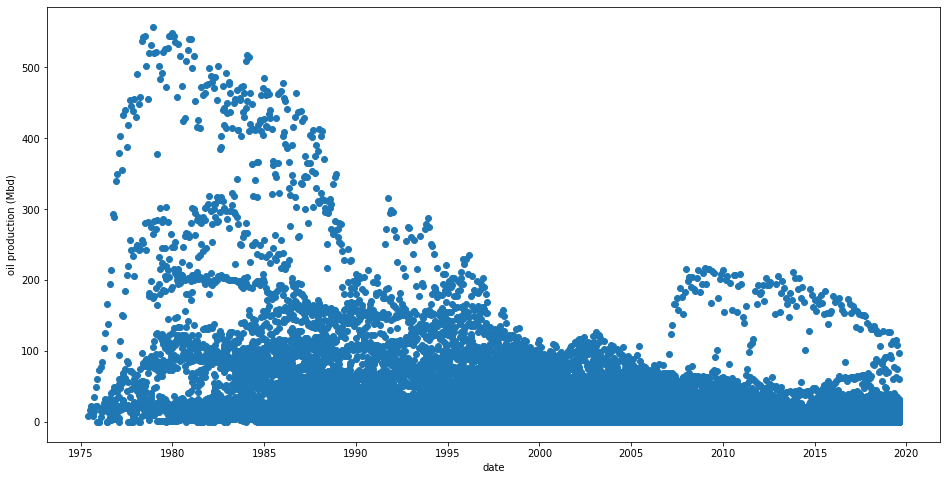

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(uk.date,uk.OILPRODMBD)
ax.set_xlabel('date')
ax.set_ylabel('oil production (Mbd)')
plt.show()

In [13]:
uk.to_csv(r'C:\Users\elias\Google Drive\python\csv\benchmark\united_kingdom\uk_benchmark.csv')

## US Land Benchmark

In [4]:
def multiple_load(path):
    global df
    files = os.listdir(path)
    files_csv = [f for f in files if f[-3:] == 'csv']
    df = pd.DataFrame()
    for f in files_csv:
        data = pd.read_csv(path+f,
                           header='infer',
                           index_col=9,
                           parse_dates=True,
                           skip_blank_lines=True,
                           infer_datetime_format=True,
                           low_memory=False)

        df = df.append(data,sort=True)

    return df

In [5]:
us=multiple_load(r'C:/Users/elias/Google Drive/python/csv/benchmark/united_states/')

,API NUMBER,"CO2, MSCF",COUNTY,"GAS, MSCF",NUMBER OF DAYS ONLINE,"OIL, BARRELS",OPERATOR,PRODUCING UNIT NAME,STATE,"SULFUR, LONG TONS","WATER, BARRELS",WELL NAME,WELL NUMBER
PRODUCTION DATE,,,,,,,,,,,,,
2018-09-01,"=""01097196750000""",NaN,Mobile,0.0,0.0,0.0,"Denbury Onshore, Llc",Citronelle Unit D-7-9,AL,NaN,0.0,Citronelle Unit D-7-9,NaN
2018-04-01,"=""01097196750000""",NaN,Mobile,0.0,0.0,0.0,"Denbury Onshore, Llc",Citronelle Unit D-7-9,AL,NaN,0.0,Citronelle Unit D-7-9,NaN
2018-08-01,"=""01053200420000""",NaN,Escambia,61794.0,31.0,2797.0,Escambia Operating Co. Llc,Scott Paper Co. 3-10 #1,AL,NaN,83.0,Scott Paper Co. 3-10 #1,NaN
2018-06-01,"=""01053200420000""",NaN,Escambia,49947.0,24.0,2204.0,Escambia Operating Co. Llc,Scott Paper Co. 3-10 #1,AL,NaN,59.0,Scott Paper Co. 3-10 #1,NaN
2018-10-01,"=""01053201030000""",NaN,Escambia,4981.0,6.0,205.0,Escambia Operating Co. Llc,Scott Paper Co. Gas Unit 24 #1,AL,NaN,51.0,Scott Paper Co. Gas Unit 24 #1,NaN
2018-06-01,"=""01053201030000""",NaN,Escambia,7810.0,6.0,324.0,Escambia Operating Co. Llc,Scott Paper Co. Gas Unit 24 #1,AL,NaN,60.0,Scott Paper Co. Gas Unit 24 #1,NaN
2018-06-01,"=""01099203310000""",NaN,Monroe,5678.0,30.0,2819.0,"Hilcorp Energy Company, Inc.",Mccall 25-9 #2,AL,NaN,47592.0,Mccall 25-9 #2,NaN
2018-02-01,"=""01099203310000""",NaN,Monroe,6260.0,28.0,2978.0,"Hilcorp Energy Company, Inc.",Mccall 25-9 #2,AL,NaN,42255.0,Mccall 25-9 #2,NaN
2018-01-01,"=""01099203310000""",NaN,Monroe,7443.0,31.0,3505.0,"Hilcorp Energy Company, Inc.",Mccall 25-9 #2,AL,NaN,45864.0,Mccall 25-9 #2,NaN


## MX Benchmark

In [50]:
def multiple_load(path):
    global df
    #path = r"/Users/fffte/Documents/GitHub/Ainda/Proyecto Newton/02_productividad/benchmark/" 
    files = os.listdir(path)
    files_csv = [f for f in files if f[-3:] == 'csv']
    df = pd.DataFrame()
    for f in files_csv:
        data = pd.read_csv(path+f,header='infer',
                           low_memory=False)

        df = df.append(data,sort=True)
    return df

In [51]:
mx=multiple_load(r"/Users/fffte/ainda_drive/python/csv/benchmark/mexico/")

In [13]:
mx=pd.read_csv(r'C:/Users/elias/Google Drive/python/csv/benchmark/mexico/pozos/mx_benchmark.csv',
              index_col=0,
              parse_dates=True,
              low_memory=False)

In [14]:
display(mx.head(),
        mx.shape,
        mx.columns)

display(mx.fecha.min())

,aceite_Mbd,agua_Mbd,asignacion,condensado_Mbd,cuenca,fecha,gas_asociado_MMpcd,gas_no_asociado_MMpcd,pozo
0,1.663233,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.212822,0.0,ANGOSTURA-2
1,0.122651,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.018338,0.0,ANGOSTURA-21
2,1.346227,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.205819,0.0,ANGOSTURA-4
3,0.045916,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.006035,0.0,ANGOSTURA-6
4,1.029092,0.0,NaN,0.0,Veracruz,1-Jul-1954,0.131679,0.0,ANGOSTURA-2


(2838332, 9)

Index(['aceite_Mbd', 'agua_Mbd', 'asignacion', 'condensado_Mbd', 'cuenca',
       'fecha', 'gas_asociado_MMpcd', 'gas_no_asociado_MMpcd', 'pozo'],
      dtype='object')

'1-Apr-1931'

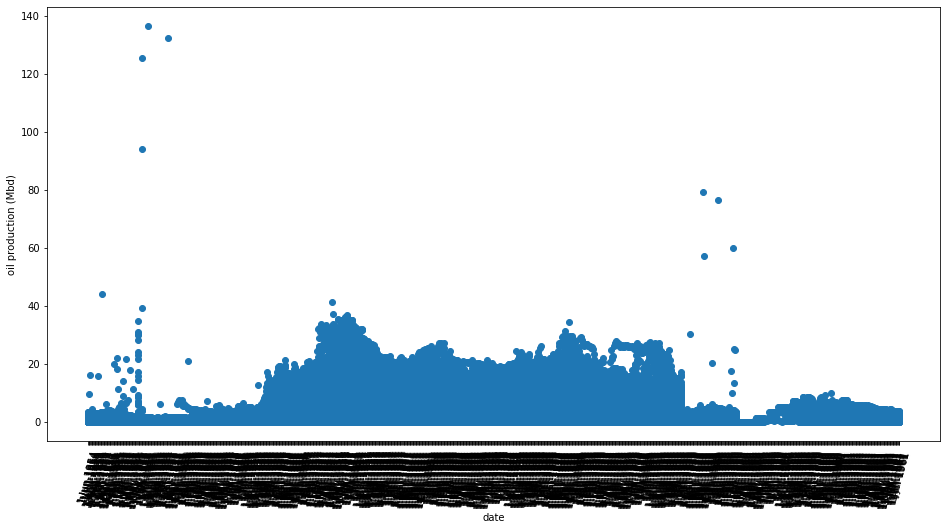

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(mx.fecha,mx.aceite_Mbd)
ax.set_xlabel('date')
ax.set_xticklabels(labels=mx.fecha,rotation=75)
ax.set_ylabel('oil production (Mbd)')
plt.show()

In [63]:
#mx.to_csv(r"/Users/fffte/ainda_drive/python/csv/benchmark/mexico/pozos/mx_benchmark.csv")

In [64]:
display(mx.shape)

(2838332, 9)

In [77]:
display(mx.head())
nuevo=mx.replace(to_replace='NaN',value='Other',regex=True)

,aceite_Mbd,agua_Mbd,asignacion,condensado_Mbd,cuenca,fecha,gas_asociado_MMpcd,gas_no_asociado_MMpcd,pozo
0,1.663233,0.0,Other,0.0,Veracruz,1-Jun-1954,0.212822,0.0,ANGOSTURA-2
1,0.122651,0.0,Other,0.0,Veracruz,1-Jun-1954,0.018338,0.0,ANGOSTURA-21
2,1.346227,0.0,Other,0.0,Veracruz,1-Jun-1954,0.205819,0.0,ANGOSTURA-4
3,0.045916,0.0,Other,0.0,Veracruz,1-Jun-1954,0.006035,0.0,ANGOSTURA-6
4,1.029092,0.0,Other,0.0,Veracruz,1-Jul-1954,0.131679,0.0,ANGOSTURA-2


In [78]:
display(nuevo.head())

,aceite_Mbd,agua_Mbd,asignacion,condensado_Mbd,cuenca,fecha,gas_asociado_MMpcd,gas_no_asociado_MMpcd,pozo
0,1.663233,0.0,Other,0.0,Veracruz,1-Jun-1954,0.212822,0.0,ANGOSTURA-2
1,0.122651,0.0,Other,0.0,Veracruz,1-Jun-1954,0.018338,0.0,ANGOSTURA-21
2,1.346227,0.0,Other,0.0,Veracruz,1-Jun-1954,0.205819,0.0,ANGOSTURA-4
3,0.045916,0.0,Other,0.0,Veracruz,1-Jun-1954,0.006035,0.0,ANGOSTURA-6
4,1.029092,0.0,Other,0.0,Veracruz,1-Jul-1954,0.131679,0.0,ANGOSTURA-2


In [79]:
nuevo.to_csv(r"/Users/fffte/ainda_drive/python/csv/benchmark/mexico/pozos/mx_benchmark2.csv")

## MX_campos

In [575]:
def multiple_load(path):
    global df
    #path = r"/Users/fffte/Documents/GitHub/Ainda/Proyecto Newton/02_productividad/benchmark/" 
    files = os.listdir(path)
    files_csv = [f for f in files if f[-3:] == 'csv']
    df = pd.DataFrame()
    for f in files_csv:
        data = pd.read_csv(path+f,skiprows=1,
                             names=['ID','NOMBRE', 'LOCALIZACION', 'ESTADO', 'LATITUD', 'LONGITUD', 'AREA',
                                    'ZONA', 'ANO DE DESCUBRIMIENTO', 'TIRANTE AGUA', 'ESTATUS',
                                   'ASIGNACION', 'OPERADOR', 'VIGENCIA', 'NUM BLOQUES', 'CAA ORIGINAL',
                                   'CAA ACTUAL', 'CGA ORIGINAL', 'CGA ACTUAL', 'NP (MMB)', 'GP (MMMPC)',
                                   'MECANISMO DE PRODUCCION', 'PRODUCCION RECORD (MBPD)',
                                   'PRODUCCION RECORD (MMPCD)', 'PRODUCCION ACEITE (MBPD)',
                                   'PRODUCCION GAS (MMPCD)', 'PRODUCCION AGUA (MBPD)', 'COLUMNA OP ACEITE',
                                   'PROYECTO IOR/EOR PROPUESTO', 'PROYECTO IOR/EOR SUGERIDO',
                                   'VOUMEN DE INYECCION DE GAS (MMPCD)',
                                   'VOUMEN DE INYECCION DE AGUA (MBPD)', 'TIPO TERMINACION',
                                   'POZOS PERFORADOS', 'POZOS PRODUCTORES', 'POZOS INYECTORES',
                                   'POZOS MONITORES PRODUCTORES', 'POZOS MONITORES',
                                   'POZOS CERRADOS CON POSIBILIDADES', 'POZOS CERRADOS SIN POSIBILIDADES',
                                   'POZOS TAPONADOS', 'REPARACIONES MENORES', 'REPARACIONES MAYORES',
                                   'SISTEMA ARTIFICIAL', 'DESCUBRIMIENTO'],
                             skip_blank_lines=True,
                             skipinitialspace=True,
                             na_filter=True)

        df = df.append(data,sort=False)
    return df

In [576]:
campos=multiple_load(r"/Users/fffte/ainda_drive/python/csv/benchmark/mexico_campos/")
campos.NOMBRE=campos.NOMBRE.str.upper()

In [582]:
cols = campos.select_dtypes(include=[np.object]).columns
campos[cols] = campos[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [584]:
lista_campos=campos.columns
display(lista_campos)

for x in lista_campos:
       lista_campos=lista_campos.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Index(['ID', 'NOMBRE', 'LOCALIZACION', 'ESTADO', 'LATITUD', 'LONGITUD', 'AREA',
       'ZONA', 'ANO DE DESCUBRIMIENTO', 'TIRANTE AGUA', 'ESTATUS',
       'ASIGNACION', 'OPERADOR', 'VIGENCIA', 'NUM BLOQUES', 'CAA ORIGINAL',
       'CAA ACTUAL', 'CGA ORIGINAL', 'CGA ACTUAL', 'NP (MMB)', 'GP (MMMPC)',
       'MECANISMO DE PRODUCCION', 'PRODUCCION RECORD (MBPD)',
       'PRODUCCION RECORD (MMPCD)', 'PRODUCCION ACEITE (MBPD)',
       'PRODUCCION GAS (MMPCD)', 'PRODUCCION AGUA (MBPD)', 'COLUMNA OP ACEITE',
       'PROYECTO IOR/EOR PROPUESTO', 'PROYECTO IOR/EOR SUGERIDO',
       'VOUMEN DE INYECCION DE GAS (MMPCD)',
       'VOUMEN DE INYECCION DE AGUA (MBPD)', 'TIPO TERMINACION',
       'POZOS PERFORADOS', 'POZOS PRODUCTORES', 'POZOS INYECTORES',
       'POZOS MONITORES PRODUCTORES', 'POZOS MONITORES',
       'POZOS CERRADOS CON POSIBILIDADES', 'POZOS CERRADOS SIN POSIBILIDADES',
       'POZOS TAPONADOS', 'REPARACIONES MENORES', 'REPARACIONES MAYORES',
       'SISTEMA ARTIFICIAL', 'DESCUBRIMI

In [585]:
display(lista_campos)

Index(['ID', 'NOMBRE', 'LOCALIZACION', 'ESTADO', 'LATITUD', 'LONGITUD', 'AREA',
       'ZONA', 'ANO DE DESCUBRIMIENTO', 'TIRANTE AGUA', 'ESTATUS',
       'ASIGNACION', 'OPERADOR', 'VIGENCIA', 'NUM BLOQUES', 'CAA ORIGINAL',
       'CAA ACTUAL', 'CGA ORIGINAL', 'CGA ACTUAL', 'NP (MMB)', 'GP (MMMPC)',
       'MECANISMO DE PRODUCCION', 'PRODUCCION RECORD (MBPD)',
       'PRODUCCION RECORD (MMPCD)', 'PRODUCCION ACEITE (MBPD)',
       'PRODUCCION GAS (MMPCD)', 'PRODUCCION AGUA (MBPD)', 'COLUMNA OP ACEITE',
       'PROYECTO IOR/EOR PROPUESTO', 'PROYECTO IOR/EOR SUGERIDO',
       'VOUMEN DE INYECCION DE GAS (MMPCD)',
       'VOUMEN DE INYECCION DE AGUA (MBPD)', 'TIPO TERMINACION',
       'POZOS PERFORADOS', 'POZOS PRODUCTORES', 'POZOS INYECTORES',
       'POZOS MONITORES PRODUCTORES', 'POZOS MONITORES',
       'POZOS CERRADOS CON POSIBILIDADES', 'POZOS CERRADOS SIN POSIBILIDADES',
       'POZOS TAPONADOS', 'REPARACIONES MENORES', 'REPARACIONES MAYORES',
       'SISTEMA ARTIFICIAL', 'DESCUBRIMI

In [586]:
campos=campos.dropna(axis=0,thresh=10)
display(campos.head(),
        campos.tail(),
        campos.shape)

,ID,NOMBRE,LOCALIZACION,ESTADO,LATITUD,LONGITUD,AREA,ZONA,ANO DE DESCUBRIMIENTO,TIRANTE AGUA,...,POZOS INYECTORES,POZOS MONITORES PRODUCTORES,POZOS MONITORES,POZOS CERRADOS CON POSIBILIDADES,POZOS CERRADOS SIN POSIBILIDADES,POZOS TAPONADOS,REPARACIONES MENORES,REPARACIONES MAYORES,SISTEMA ARTIFICIAL,DESCUBRIMIENTO
0,1.0,ABKATUN,Se encuentra localizado en aguas territoriales...,Aguas Territoriales del G. de M.,19.249124,-92.187614,94.72,Aguas Someras,1979.0,30.0,...,4.0,0.0,0.0,2.0,29.0,64.0,NaN,NaN,BN,NaN
1,2.0,AKAL,Se ubica aproximadamente 85 km al noroeste de ...,Aguas Territoriales del G. de M.,19.399108,-92.053230,191.87,Aguas Someras,1976.0,30.0,...,42.0,30.0,10.0,9.0,33.0,214.0,NaN,NaN,BN,NaN
2,3.0,AKPUL,Se localiza a 102 km al noreste de Ciudad del ...,Aguas Territoriales del G. de M.,19.003562,-92.715704,45.26,Aguas Someras,2003.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4.0,ALAK,Se ubica a 130 km al noroeste de Ciudad del Ca...,Aguas Territoriales del G. de M.,19.455041,-92.790568,11.60,Aguas Someras,1999.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,5.0,ALUX,Se ubica a 84 km al noreste de la Terminal Mar...,Aguas Territoriales del G. de M.,19.049190,-92.711176,969.00,Aguas Someras,1992.0,69.8,...,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,BN,NaN


,ID,NOMBRE,LOCALIZACION,ESTADO,LATITUD,LONGITUD,AREA,ZONA,ANO DE DESCUBRIMIENTO,TIRANTE AGUA,...,POZOS INYECTORES,POZOS MONITORES PRODUCTORES,POZOS MONITORES,POZOS CERRADOS CON POSIBILIDADES,POZOS CERRADOS SIN POSIBILIDADES,POZOS TAPONADOS,REPARACIONES MENORES,REPARACIONES MAYORES,SISTEMA ARTIFICIAL,DESCUBRIMIENTO
5,6.0,MAXIMINO,Se localiza en la zona economica exclusiva del...,Aguas Territoriales del G. de M.,NaN,NaN,NaN,Aguas Profundas,2012.0,2919.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,PIKLIS,Se localiza a 103 km al este del puerto de Ver...,Aguas Territoriales del G. de M.,NaN,NaN,NaN,Aguas Profundas,2011.0,1928.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,SUPREMUS,Se ubica en el sector del cinturon plegado per...,Aguas Territoriales del G. de M.,NaN,NaN,NaN,Aguas Profundas,2012.0,2874.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,TRION,Se ubica en el area del cinturon subsalino y e...,Aguas Territoriales del G. de M.,25.764290,-95.385284,NaN,Aguas Profundas,2012.0,2535.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,ZAZIL-HA,Se localiza en la porcion central de la sonda ...,Aguas Territoriales del G. de M.,19.666145,-92.476905,9.5,Aguas Profundas,1982.0,169.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,BEC,NaN


(562, 45)

In [587]:
campos.to_csv(r"/Users/fffte/ainda_drive/python/csv/benchmark/mx_campos.csv")

# Merge MX pozos/campos

In [632]:
pozos=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/mexico/pozos/mx_benchmark.csv',
                 low_memory=False,index_col='pozo')

campos=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/mx_campos.csv',
                 low_memory=False,index_col='NOMBRE')

In [631]:
display(pozos.head(),
        campos.head())

,Unnamed: 0,aceite_Mbd,agua_Mbd,asignacion,condensado_Mbd,cuenca,gas_asociado_MMpcd,gas_no_asociado_MMpcd,pozo
fecha,,,,,,,,,
1-Jun-1954,0,1.663233,0.0,NaN,0.0,Veracruz,0.212822,0.0,ANGOSTURA-2
1-Jun-1954,1,0.122651,0.0,NaN,0.0,Veracruz,0.018338,0.0,ANGOSTURA-21
1-Jun-1954,2,1.346227,0.0,NaN,0.0,Veracruz,0.205819,0.0,ANGOSTURA-4
1-Jun-1954,3,0.045916,0.0,NaN,0.0,Veracruz,0.006035,0.0,ANGOSTURA-6
1-Jul-1954,4,1.029092,0.0,NaN,0.0,Veracruz,0.131679,0.0,ANGOSTURA-2


,Unnamed: 0,ID,LOCALIZACION,ESTADO,LATITUD,LONGITUD,AREA,ZONA,ANO DE DESCUBRIMIENTO,TIRANTE AGUA,...,POZOS INYECTORES,POZOS MONITORES PRODUCTORES,POZOS MONITORES,POZOS CERRADOS CON POSIBILIDADES,POZOS CERRADOS SIN POSIBILIDADES,POZOS TAPONADOS,REPARACIONES MENORES,REPARACIONES MAYORES,SISTEMA ARTIFICIAL,DESCUBRIMIENTO
NOMBRE,,,,,,,,,,,,,,,,,,,,,
ABKATUN,0,1.0,Se encuentra localizado en aguas territoriales...,Aguas Territoriales del G. de M.,19.249124,-92.187614,94.72,Aguas Someras,1979.0,30.0,...,4.0,0.0,0.0,2.0,29.0,64.0,NaN,NaN,BN,NaN
AKAL,1,2.0,Se ubica aproximadamente 85 km al noroeste de ...,Aguas Territoriales del G. de M.,19.399108,-92.053230,191.87,Aguas Someras,1976.0,30.0,...,42.0,30.0,10.0,9.0,33.0,214.0,NaN,NaN,BN,NaN
AKPUL,2,3.0,Se localiza a 102 km al noreste de Ciudad del ...,Aguas Territoriales del G. de M.,19.003562,-92.715704,45.26,Aguas Someras,2003.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ALAK,3,4.0,Se ubica a 130 km al noroeste de Ciudad del Ca...,Aguas Territoriales del G. de M.,19.455041,-92.790568,11.60,Aguas Someras,1999.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
ALUX,4,5.0,Se ubica a 84 km al noreste de la Terminal Mar...,Aguas Territoriales del G. de M.,19.049190,-92.711176,969.00,Aguas Someras,1992.0,69.8,...,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,BN,NaN


In [622]:
pozos.pozo.str.contains('ANGOS')

0           True
1           True
2           True
3           True
4           True
           ...  
2838327    False
2838328    False
2838329    False
2838330    False
2838331    False
Name: pozo, Length: 2838332, dtype: bool

In [634]:
df=pozos.merge(campos,how='outer')
display(df)

,Unnamed: 0,aceite_Mbd,agua_Mbd,asignacion,condensado_Mbd,cuenca,fecha,gas_asociado_MMpcd,gas_no_asociado_MMpcd,ID,...,POZOS INYECTORES,POZOS MONITORES PRODUCTORES,POZOS MONITORES,POZOS CERRADOS CON POSIBILIDADES,POZOS CERRADOS SIN POSIBILIDADES,POZOS TAPONADOS,REPARACIONES MENORES,REPARACIONES MAYORES,SISTEMA ARTIFICIAL,DESCUBRIMIENTO
0,0,1.663233,0.000000,NaN,0.0,Veracruz,1-Jun-1954,0.212822,0.0,1.0,...,4.0,0.0,0.0,2.0,29.0,64.0,NaN,NaN,BN,NaN
1,0,1.663233,0.000000,NaN,0.0,Veracruz,1-Jun-1954,0.212822,0.0,1.0,...,0.0,NaN,NaN,1.0,1.0,76.0,NaN,NaN,BM,NaN
2,0,1.663233,0.000000,NaN,0.0,Veracruz,1-Jun-1954,0.212822,0.0,1.0,...,0.0,NaN,NaN,1.0,7.0,19.0,NaN,NaN,NaN,NaN
3,0,1.663233,0.000000,NaN,0.0,Veracruz,1-Jun-1954,0.212822,0.0,1.0,...,0.0,0.0,1.0,11.0,14.0,0.0,0.0,"Lanzador de barras, Valvulamotora, Minicompres...",NaN,NaN
4,0,1.663233,0.000000,NaN,0.0,Veracruz,1-Jun-1954,0.212822,0.0,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840987,999995,0.014047,0.002406,NaN,0.0,Tampico-Misantla,1-Nov-2014,0.007836,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2840988,999996,0.000587,0.000012,NaN,0.0,Tampico-Misantla,1-Nov-2014,0.003610,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2840989,999997,0.010925,0.001178,NaN,0.0,Tampico-Misantla,1-Nov-2014,0.039181,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2840990,999998,0.013006,0.000000,NaN,0.0,Tampico-Misantla,1-Nov-2014,0.005224,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Features MX Pozos

In [143]:
path=r'C:/Users/elias/Google Drive/python/csv/benchmark/mx_pozos/'
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']
df = pd.DataFrame()
for f in files_csv:
    data = pd.read_csv(path+f,header='infer',
                         skip_blank_lines=True,
                         skipinitialspace=True,
                         na_filter=True)

    df = df.append(data,sort=True)
    
lista_campos=pd.Series(df.columns)

for x in lista_campos:
           lista_campos=lista_campos.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
           lista_campos=lista_campos.str.upper() 
            
display(lista_campos,df.head())

0       ANO DE PERFORACION
1                    CAMPO
2            CLASIFICACION
3               DISPONIBLE
4                  ENTIDAD
5            ESTADO ACTUAL
6                      GID
7                     POZO
8        PROFUNDIDAD TOTAL
9     PROFUNDIDAD VERTICAL
10    TIPO DE HIDROCARBURO
11             TRAYECTORIA
12               UBICACION
dtype: object

,AñO DE PERFORACIóN,CAMPO,CLASIFICACIóN,DISPONIBLE,ENTIDAD,ESTADO ACTUAL,GID,POZO,PROFUNDIDAD TOTAL,PROFUNDIDAD VERTICAL,TIPO DE HIDROCARBURO,TRAYECTORIA,UBICACIóN
0,2004.0,NAB,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,INACTIVO,235589,NAB-1,4050.0,4050.0,ACEITE,VERTICAL,MARINO
1,2014.0,NAT,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,INACTIVO,245158,NAT-1,5531.0,5531.0,GAS HUMEDO,VERTICAL,MARINO
2,2011.0,NEN,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,INACTIVO,235231,NEN-1,4350.0,4350.0,GAS SECO,VERTICAL,MARINO
3,2013.0,PEP,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,CERRADO,237534,PEP-1,6539.0,6539.0,GAS,VERTICAL,MARINO
4,2005.0,BOK,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,CERRADO,236366,BOK-1,3225.0,3225.0,NaN,VERTICAL,MARINO


In [26]:
def multiple_load(path):
    global df
    files = os.listdir(path)
    files_csv = [f for f in files if f[-3:] == 'csv']
    df = pd.DataFrame()
    for f in files_csv:
        data = pd.read_csv(path+f,header=1,
                             names=['GID',
                                    'POZO',
                                    'CAMPO',
                                    'ENTIDAD',
                                    'UBICACION',
                                    'CLASIFICACION',
                                    'ESTADO ACTUAL',
                                    'TIPO DE HIDROCARBURO',
                                    'ANO DE PERFORACION',
                                    'PROFUNDIDAD TOTAL',
                                    'PROFUNDIDAD VERTICAL',
                                    'TRAYECTORIA',
                                    'DISPONIBLE'],
                             index_col='POZO',
                             skip_blank_lines=True,
                             skipinitialspace=True,
                             na_filter=True)

        df = df.append(data,sort=True)
    return df

In [54]:
multiple_load(r'C:/Users/elias/Google Drive/python/csv/benchmark/mx_pozos/')
display(df.head())

,ANO DE PERFORACION,CAMPO,CLASIFICACION,DISPONIBLE,ENTIDAD,ESTADO ACTUAL,GID,PROFUNDIDAD TOTAL,PROFUNDIDAD VERTICAL,TIPO DE HIDROCARBURO,TRAYECTORIA,UBICACION
POZO,,,,,,,,,,,,
NAT-1,2014.0,NAT,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,INACTIVO,245158,5531.0,5531.0,GAS HUMEDO,VERTICAL,MARINO
NEN-1,2011.0,NEN,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,INACTIVO,235231,4350.0,4350.0,GAS SECO,VERTICAL,MARINO
PEP-1,2013.0,PEP,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,CERRADO,237534,6539.0,6539.0,GAS,VERTICAL,MARINO
BOK-1,2005.0,BOK,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,CERRADO,236366,3225.0,3225.0,NaN,VERTICAL,MARINO
HEM-1,2015.0,HEM,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,CERRADO,250123,4429.0,4345.0,GAS HUMEDO,VERTICAL,MARINO


In [55]:
df.to_csv(r"C:/Users/elias/Google Drive/python/csv/benchmark/mexico/pozos/mx_pozos.csv")

In [56]:
pozos=pd.read_csv(r'C:/Users/elias/Google Drive/python/csv/benchmark/mexico/pozos/mx_benchmark.csv',
                 low_memory=False,index_col='pozo')

In [57]:
display(pozos.head())

,Unnamed: 0,aceite_Mbd,agua_Mbd,asignacion,condensado_Mbd,cuenca,fecha,gas_asociado_MMpcd,gas_no_asociado_MMpcd
pozo,,,,,,,,,
ANGOSTURA-2,0,1.663233,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.212822,0.0
ANGOSTURA-21,1,0.122651,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.018338,0.0
ANGOSTURA-4,2,1.346227,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.205819,0.0
ANGOSTURA-6,3,0.045916,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.006035,0.0
ANGOSTURA-2,4,1.029092,0.0,NaN,0.0,Veracruz,1-Jul-1954,0.131679,0.0


In [60]:
df=df.reset_index()
df.rename(columns={'POZO':'pozo'},inplace=True)
display(df.head())

,pozo,ANO DE PERFORACION,CAMPO,CLASIFICACION,DISPONIBLE,ENTIDAD,ESTADO ACTUAL,GID,PROFUNDIDAD TOTAL,PROFUNDIDAD VERTICAL,TIPO DE HIDROCARBURO,TRAYECTORIA,UBICACION
0,NAT-1,2014.0,NAT,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,INACTIVO,245158,5531.0,5531.0,GAS HUMEDO,VERTICAL,MARINO
1,NEN-1,2011.0,NEN,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,INACTIVO,235231,4350.0,4350.0,GAS SECO,VERTICAL,MARINO
2,PEP-1,2013.0,PEP,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,CERRADO,237534,6539.0,6539.0,GAS,VERTICAL,MARINO
3,BOK-1,2005.0,BOK,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,CERRADO,236366,3225.0,3225.0,NaN,VERTICAL,MARINO
4,HEM-1,2015.0,HEM,EXPLORATORIO,Disponible,AGUAS TERRITORIALES,CERRADO,250123,4429.0,4345.0,GAS HUMEDO,VERTICAL,MARINO


In [61]:
df2=pd.DataFrame.merge(pozos,df,how='outer',on='pozo')

In [63]:
df2=df2.set_index('pozo')
display(df2.head())

,Unnamed: 0,aceite_Mbd,agua_Mbd,asignacion,condensado_Mbd,cuenca,fecha,gas_asociado_MMpcd,gas_no_asociado_MMpcd,ANO DE PERFORACION,...,CLASIFICACION,DISPONIBLE,ENTIDAD,ESTADO ACTUAL,GID,PROFUNDIDAD TOTAL,PROFUNDIDAD VERTICAL,TIPO DE HIDROCARBURO,TRAYECTORIA,UBICACION
pozo,,,,,,,,,,,,,,,,,,,,,
ANGOSTURA-2,0.0,1.663233,0.0,NaN,0.0,Veracruz,1-Jun-1954,0.212822,0.0,1953.0,...,DESARROLLO,Disponible,VERACRUZ DE IGNACIO DE LA LLAVE,INACTIVO,140004.0,1354.41,NaN,ACEITE,VERTICAL,TERRESTRE
ANGOSTURA-2,4.0,1.029092,0.0,NaN,0.0,Veracruz,1-Jul-1954,0.131679,0.0,1953.0,...,DESARROLLO,Disponible,VERACRUZ DE IGNACIO DE LA LLAVE,INACTIVO,140004.0,1354.41,NaN,ACEITE,VERTICAL,TERRESTRE
ANGOSTURA-2,8.0,0.356693,0.0,NaN,0.0,Veracruz,1-Aug-1954,0.045641,0.0,1953.0,...,DESARROLLO,Disponible,VERACRUZ DE IGNACIO DE LA LLAVE,INACTIVO,140004.0,1354.41,NaN,ACEITE,VERTICAL,TERRESTRE
ANGOSTURA-2,13.0,0.628561,0.0,NaN,0.0,Veracruz,1-Sep-1954,0.080428,0.0,1953.0,...,DESARROLLO,Disponible,VERACRUZ DE IGNACIO DE LA LLAVE,INACTIVO,140004.0,1354.41,NaN,ACEITE,VERTICAL,TERRESTRE
ANGOSTURA-2,18.0,1.123237,0.0,NaN,0.0,Veracruz,1-Oct-1954,0.143725,0.0,1953.0,...,DESARROLLO,Disponible,VERACRUZ DE IGNACIO DE LA LLAVE,INACTIVO,140004.0,1354.41,NaN,ACEITE,VERTICAL,TERRESTRE


In [66]:
df2.to_csv(r"C:/Users/elias/Google Drive/python/csv/benchmark/mexico/mx_full.csv")

In [67]:
display(df2.shape)

(2851710, 21)

# Reservas

In [24]:
reservas_aceite=pd.read_csv(r'C:/Users/elias/Google Drive/python/csv/benchmark/mexico/mx_reservas/reservas_aceite.csv',
                 index_col=[0],
                 low_memory=True)

reservas_gas=pd.read_csv(r'C:/Users/elias/Google Drive/python/csv/benchmark/mexico//mx_reservas/reservas_gas.csv',
                 index_col=[0],
                 low_memory=True)

In [25]:
display(reservas_aceite.head(),
        reservas_gas.head())

,campo_oficial,campo_sih,ubicación,cuenca,categoria,petroleo_MMb
fecha,,,,,,
1999,Abkatún,ABKATUN,Aguas someras,Cuencas del Sureste,2P,41.189580
1999,Abkatún,ABKATUN,Aguas someras,Cuencas del Sureste,1P,179.380888
1999,Abkatún,ABKATUN,Aguas someras,Cuencas del Sureste,3P,192.273180
2000,Abkatún,ABKATUN,Aguas someras,Cuencas del Sureste,3P,248.219007
2000,Abkatún,ABKATUN,Aguas someras,Cuencas del Sureste,1P,112.855403


,asignacion,ubicacion,cuenca,tipo,gas_natural_MMMpc
fecha,,,,,
2017,A-0001,Aguas someras,Cuencas del Sureste,1P,6.687784
2017,A-0001,Aguas someras,Cuencas del Sureste,2P,139.614764
2017,A-0001,Aguas someras,Cuencas del Sureste,3P,274.970456
2017,A-0002,Terrestre,Tampico-Misantla,1P,0.779818
2017,A-0002,Terrestre,Tampico-Misantla,2P,1.681629
